### data prepration


In [1]:
print("radhe radhe")

radhe radhe


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

# IMPORT DATASET PATH
DATASET_PATH= os.getenv("DATASET_PATH")

In [3]:
print(DATASET_PATH)

/home/radhe/Subha/internship/werather_forcastiing/dataset/All_disticts.csv


In [4]:
import pandas as pd
# LOAD DATASET
df = pd.read_csv(DATASET_PATH)
df


,Date,Bankura_temp,Birbhum_temp,Burdwan_temp,Darjeeling_temp,Hooghly_temp,Howrah_temp,Jalpaiguri_temp,Kochbihar_temp,Kolkata_temp,Malda_temp,Medinipur_temp,Murshidabad_temp,Nadia_temp,North-24-Parganas_temp,North-Dinajpur_temp,Purulia_temp,South-24-Parganas_temp,South-Dinajpur_temp
0,1901-01-01,17.970,17.405,18.108,14.058,18.897,19.161,15.593,15.917,19.106,15.670,18.889,17.540,18.428,18.522,15.151,17.159,15.968,16.580
1,1901-02-01,21.334,21.435,21.879,16.913,22.437,22.497,18.650,19.243,22.600,19.754,21.892,21.501,22.215,21.830,18.845,20.297,18.558,20.409
2,1901-03-01,26.523,26.422,26.913,21.394,27.463,27.343,23.034,23.535,27.495,24.729,26.686,26.360,26.938,26.097,23.732,25.467,22.129,25.228
3,1901-04-01,31.712,31.807,31.968,25.806,31.886,31.445,27.258,27.823,31.686,30.027,30.972,31.581,31.725,29.794,28.800,30.974,25.039,30.325
4,1901-05-01,32.202,31.714,31.934,26.155,31.622,31.316,27.323,27.809,31.392,29.840,31.223,31.243,31.368,29.616,28.859,32.114,25.069,29.959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2002-08-01,28.106,28.499,28.547,27.061,28.633,28.567,28.438,29.013,28.697,28.286,27.852,28.819,28.898,27.609,28.474,27.416,23.336,29.026
1220,2002-09-01,28.072,28.519,28.568,26.502,28.653,28.603,27.949,28.511,28.700,28.224,27.888,28.916,29.102,27.743,28.198,27.325,23.492,29.013
1221,2002-10-01,26.541,27.130,27.294,25.052,27.605,27.644,26.433,26.938,27.800,26.828,26.773,27.597,27.991,26.991,26.759,25.715,22.852,27.534
1222,2002-11-01,22.598,23.074,23.383,21.598,23.950,24.075,23.091,23.490,24.203,22.864,23.184,23.883,24.294,23.672,22.735,21.676,20.090,24.069


In [5]:
import pandas as pd

class TemperatureDataTransformer:
    def __init__(self, data):
        """
        Initialize the class with the wide-format data.
        """
        self.df_wide = pd.DataFrame(data)

    def wide_to_long(self):
        """
        Transform the wide-format data into long format.
        """
        df_long = self.df_wide.melt(id_vars=['Year'], var_name='Month', value_name='Temperature')
        df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Month'] + '-01')
        df_long = df_long.set_index('Date')[['Temperature']]
        df_long=df_long.sort_index()
        return df_long

    def long_to_wide(self, df_long):
        """
        Transform the long-format data back into wide format.
        """
        df_long = df_long.reset_index()
        df_long['Year'] = df_long['Date'].dt.year
        df_long['Month'] = df_long['Date'].dt.month_name().str[:3]
        df_wide = df_long.pivot(index='Year', columns='Month', values='Temperature')
        # Reorder columns to match the original format
        month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        df_wide = df_wide[month_order]
        return df_wide.reset_index()


In [6]:
convert=TemperatureDataTransformer(df)
df_long=convert.wide_to_long()
df_long
# convert.long_to_wide(df_long=df_long)

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Year']"

In [7]:
# plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,20))
plt.plot(df_long)

NameError: name 'df_long' is not defined

<Figure size 3000x2000 with 0 Axes>

In [8]:
from statsmodels.tsa.stattools import adfuller

def check_ADF_stationarity(df):
    """
    Performs the Augmented Dickey-Fuller test to check for stationarity.

    Parameters:
    - df: pandas DataFrame containing the time series data
    - column: str, the column to analyze

    Prints:
    - ADF Statistic
    - p-value
    - Critical values
    - Stationarity conclusion
    """
    result = adfuller(df)

    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")

    if result[1] < 0.05:
        print("✅ The time series is **stationary** (rejects H0).")
        return 1
    else:
        print("❌ The time series is **non-stationary** (fails to reject H0).")
        return 0




In [9]:
check_ADF_stationarity(df_long)

NameError: name 'df_long' is not defined

In [10]:
from statsmodels.tsa.stattools import kpss

def check_kpss_stationarity(df):
    """
    Performs the KPSS test to check for stationarity.

    Parameters:
    - df: pandas DataFrame containing the time series data
    - column: str, the column to analyze

    Prints:
    - KPSS Statistic
    - p-value
    - Critical values
    - Stationarity conclusion
    """
    result = kpss(df, regression="c", nlags="auto")

    print(f"KPSS Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for key, value in result[3].items():
        print(f"   {key}: {value:.4f}")

    if result[1] < 0.05:
        print("❌ The time series is **non-stationary** (rejects H0).")
        return 0
    else:
        print("✅ The time series is **stationary** (fails to reject H0).")
        return 1



In [11]:
check_kpss_stationarity(df_long)

NameError: name 'df_long' is not defined

In [12]:
import numpy as np
import pandas as pd
import warnings
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning

# Suppress InterpolationWarnings from KPSS test
warnings.simplefilter("ignore", InterpolationWarning)

def find_d_val(df):
    """
    Check if a time series is stationary using both ADF and KPSS tests.
    If non-stationary, apply first-order differencing and re-evaluate.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the time series data.
    column_name (str): The column to check for stationarity.

    Returns:
    dict: A dictionary containing month and d value d mean order of diffrence .
    """
    data = df.dropna()
    is_stationary = False  # Default: Assume non-stationary
    d=-1
    while not is_stationary:
        # ADF Test
        adf_result = adfuller(data)
        adf_p_value = round(adf_result[1], 4)

        # KPSS Test with error handling
        try:
            kpss_result = kpss(data, regression="c", nlags="auto")
            kpss_p_value = round(kpss_result[1], 4)
        except ValueError as e:
            print(f"⚠️ KPSS Test Warning for: {e}")
            kpss_p_value = None  # Assign None if KPSS fails

        # Decision Logic
        if adf_p_value < 0.05 and (kpss_p_value is None or kpss_p_value > 0.05):
            is_stationary = True
        d+=1
        data=data.diff().dropna()
        
    # Initial results
    result = {
        "d": d
    }
    return result



In [13]:
result = find_d_val(df_long)
print(result)

NameError: name 'df_long' is not defined

In [14]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Compute ACF for the full data
plt.figure(figsize=(12, 5))
plot_acf(df_long, lags=40, title="ACF of Full Data")
plt.show()

NameError: name 'df_long' is not defined

<Figure size 1200x500 with 0 Axes>

In [15]:
# Compute ACF for the full data
plt.figure(figsize=(12, 5))
plot_pacf(df_long, lags=40, title="ACF of Full Data")
plt.show()

NameError: name 'df_long' is not defined

<Figure size 1200x500 with 0 Axes>

In [16]:
df_long

NameError: name 'df_long' is not defined

In [17]:

import datetime
from dateutil.relativedelta import relativedelta  # Import relativedelta

# Define the train end date
train_end_date = datetime.datetime(1992, 12, 1)

# Calculate the test start date by adding 1 month
test_start = train_end_date + relativedelta(months=1)

train_data=df_long[:train_end_date].Temperature
test_data=df_long[test_start:].Temperature

NameError: name 'df_long' is not defined

In [18]:
from statsmodels.tsa.arima.model import ARIMA
# Define ARIMA model with (p,d,q) order
model = ARIMA(train_data, order=(7, 1, 1))

# Fit the model
model_fit = model.fit()

# Print summary
print(model_fit.summary())

NameError: name 'train_data' is not defined

In [21]:
test_data.index[0]

Timestamp('1993-01-01 00:00:00')

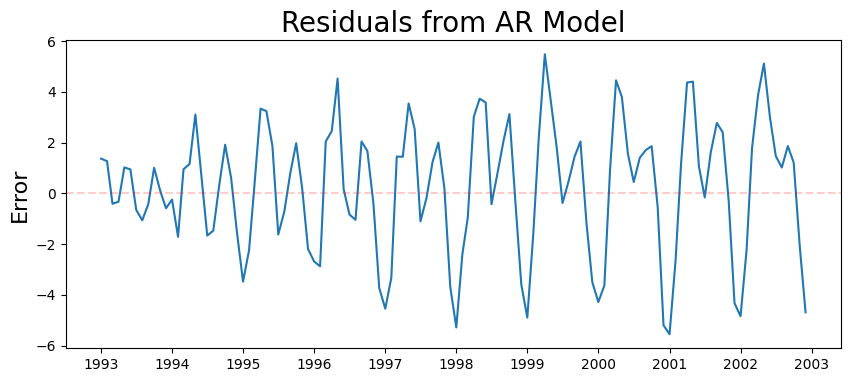

In [22]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]


#get the predictions and residuals
pred = model_fit.predict(start=pred_start_date, end=pred_end_date)
# pred=pred.cumsum()+df[mon].iloc[split_size+1]
acc=test_data
residuals = acc-pred

# plotting error
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'temp')

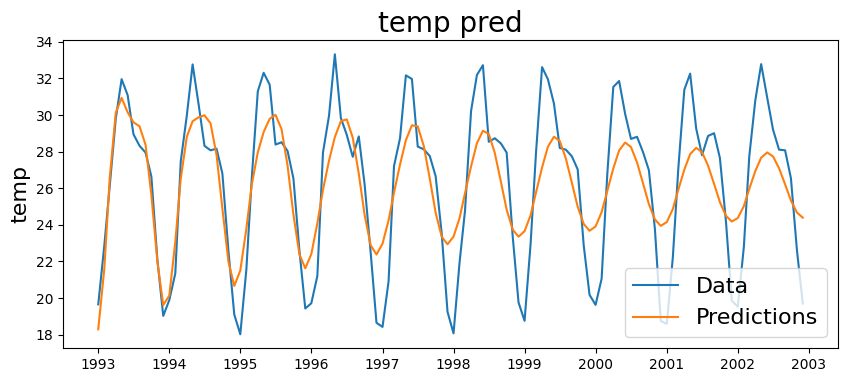

In [23]:
plt.figure(figsize=(10,4))

# plt.plot(test_data[month])
# plt.plot(predictions)
plt.plot(acc)
plt.plot(pred)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('temp pred', fontsize=20)
plt.ylabel('temp', fontsize=16)

In [24]:

# with noice
from sklearn.metrics import r2_score
r2_score(np.array(acc),np.array(pred))

0.6618324697408856

### Roling window arima


In [25]:
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming df_long is your long-format time series with a DateTime index
# Ensure the index has a frequency (e.g., 'MS' for monthly data)
df_long = df_long.asfreq('MS')

# Create a copy of the test data to store rolling predictions
rolling_predictions = test_data.copy()

# Iterate over the test data index
for train_end in test_data.index:
    # Extract training data up to the current train_end (excluding the last observation)
    train_data_roll = df_long[:train_end][:-1]
    
    # Fit the ARIMA model
    model = ARIMA(train_data_roll, order=(7, 1, 1))
    model_fit = model.fit()  # Use a valid optimization method
    
    # Forecast the next value
    pred = model_fit.forecast()
    
    # Store the prediction in the rolling_predictions DataFrame
    rolling_predictions.loc[train_end] = pred.iloc[0]  # Use .iloc[0] to avoid FutureWarning
    
    print(f"Prediction for {train_end}: {pred.iloc[0]}")

# Print the final rolling predictions
print(rolling_predictions)

d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-01-01 00:00:00: 18.291341853284294


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-02-01 00:00:00: 22.787743491291828


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-03-01 00:00:00: 27.258869112344478


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-04-01 00:00:00: 28.87078482571741


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-05-01 00:00:00: 30.184144389355076


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-06-01 00:00:00: 31.34914803448097


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-07-01 00:00:00: 30.41130971276524


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-08-01 00:00:00: 27.51355105147324
Prediction for 1993-09-01 00:00:00: 26.622108354555408


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-10-01 00:00:00: 26.075457721364216


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-11-01 00:00:00: 23.71638769014368


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1993-12-01 00:00:00: 19.157126343127988


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1994-01-01 00:00:00: 18.75579877817724
Prediction for 1994-02-01 00:00:00: 23.212162103113236


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1994-03-01 00:00:00: 25.92031500808126


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1994-04-01 00:00:00: 30.507364099328527


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1994-05-01 00:00:00: 30.574001639399118


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1994-06-01 00:00:00: 32.018780270644875
Prediction for 1994-07-01 00:00:00: 29.285806984074817
Prediction for 1994-08-01 00:00:00: 26.858127423177812


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1994-09-01 00:00:00: 27.401017383901138


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1994-10-01 00:00:00: 26.106995560430153


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1994-11-01 00:00:00: 23.81655215995252
Prediction for 1994-12-01 00:00:00: 19.084681386771102
Prediction for 1995-01-01 00:00:00: 18.835476332128664


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1995-02-01 00:00:00: 21.67104609812604


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1995-03-01 00:00:00: 26.707880415419417
Prediction for 1995-04-01 00:00:00: 30.305654408975208
Prediction for 1995-05-01 00:00:00: 32.04019036235793
Prediction for 1995-06-01 00:00:00: 31.141945962278413


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1995-07-01 00:00:00: 29.958694906873504
Prediction for 1995-08-01 00:00:00: 27.409135664577125


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1995-09-01 00:00:00: 27.457782602825404


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1995-10-01 00:00:00: 26.096840851766494
Prediction for 1995-11-01 00:00:00: 22.967228792513676


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1995-12-01 00:00:00: 19.368098306080455


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-01-01 00:00:00: 18.785503930216493
Prediction for 1996-02-01 00:00:00: 23.050269963749265


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-03-01 00:00:00: 25.59057848878617


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-04-01 00:00:00: 31.039631758307188


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-05-01 00:00:00: 30.62490613423633


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-06-01 00:00:00: 32.09408050693074


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-07-01 00:00:00: 28.31625957438672


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-08-01 00:00:00: 27.529869723932578


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-09-01 00:00:00: 27.26781870358052


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-10-01 00:00:00: 26.480082272868657


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-11-01 00:00:00: 23.16422426834938


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1996-12-01 00:00:00: 18.797067234985594


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1997-01-01 00:00:00: 18.95609322015271
Prediction for 1997-02-01 00:00:00: 22.074773034429388


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1997-03-01 00:00:00: 26.35897828765846


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1997-04-01 00:00:00: 30.675855700057667


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1997-05-01 00:00:00: 30.088929274928294


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1997-06-01 00:00:00: 31.62734559879227


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1997-07-01 00:00:00: 31.403054068410594


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1997-08-01 00:00:00: 27.414805364448767


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1997-09-01 00:00:00: 27.041596588213384
Prediction for 1997-10-01 00:00:00: 25.717024058972868


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1997-11-01 00:00:00: 24.499644215160224
Prediction for 1997-12-01 00:00:00: 20.364307837080986


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-01-01 00:00:00: 18.13195431198069


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-02-01 00:00:00: 21.283735888458192


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-03-01 00:00:00: 26.889506509480704


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-04-01 00:00:00: 28.914091099383157


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-05-01 00:00:00: 31.475340231829325


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-06-01 00:00:00: 31.57746414794821


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-07-01 00:00:00: 31.458378846119288


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-08-01 00:00:00: 27.19919808055585


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-09-01 00:00:00: 26.875984153305772
Prediction for 1998-10-01 00:00:00: 27.086047980188564


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-11-01 00:00:00: 24.54786027258435


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1998-12-01 00:00:00: 19.55333940416375


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-01-01 00:00:00: 17.764594168784456


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-02-01 00:00:00: 21.679059250095918


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-03-01 00:00:00: 27.25120756959159


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-04-01 00:00:00: 30.78534648309409


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-05-01 00:00:00: 31.740091480441222


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-06-01 00:00:00: 29.575184095287202


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-07-01 00:00:00: 28.42004754398038


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-08-01 00:00:00: 27.493630850608266


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-09-01 00:00:00: 27.138105969748153


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-10-01 00:00:00: 25.54101835511223


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-11-01 00:00:00: 23.044397125063877


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 1999-12-01 00:00:00: 19.932728047690723
Prediction for 2000-01-01 00:00:00: 19.697655316076325


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2000-02-01 00:00:00: 22.78784145353245


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2000-03-01 00:00:00: 25.522057374237974
Prediction for 2000-04-01 00:00:00: 30.23419087037162


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2000-05-01 00:00:00: 32.38457927561547


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2000-06-01 00:00:00: 30.79519671906708


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2000-07-01 00:00:00: 28.143159379980382


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2000-08-01 00:00:00: 27.742052201513356


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2000-09-01 00:00:00: 28.67817574891556


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2000-10-01 00:00:00: 25.984696621658433
Prediction for 2000-11-01 00:00:00: 23.085114591391857


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2000-12-01 00:00:00: 20.677774873098528


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2001-01-01 00:00:00: 18.548936950187304


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2001-02-01 00:00:00: 21.732944393964996
Prediction for 2001-03-01 00:00:00: 27.023213804848435
Prediction for 2001-04-01 00:00:00: 30.713983522444114


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2001-05-01 00:00:00: 31.665863661638785


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2001-06-01 00:00:00: 30.50358641297232
Prediction for 2001-07-01 00:00:00: 28.181671851461545
Prediction for 2001-08-01 00:00:00: 27.546183843514264


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2001-09-01 00:00:00: 28.713371196792767


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2001-10-01 00:00:00: 27.207768406389434


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2001-11-01 00:00:00: 23.42112487174737


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2001-12-01 00:00:00: 20.18492667979831


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2002-01-01 00:00:00: 19.4320632153127
Prediction for 2002-02-01 00:00:00: 22.550973902910098


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2002-03-01 00:00:00: 26.854626026689722


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2002-04-01 00:00:00: 30.302863854375364
Prediction for 2002-05-01 00:00:00: 30.519967304488073


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2002-06-01 00:00:00: 30.728018580921756


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2002-07-01 00:00:00: 29.289383133035358


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2002-08-01 00:00:00: 27.842177905626492


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2002-09-01 00:00:00: 26.729396587613724
Prediction for 2002-10-01 00:00:00: 25.757126947156006


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prediction for 2002-11-01 00:00:00: 23.45996839960819
Prediction for 2002-12-01 00:00:00: 19.522250880542867
Date
1993-01-01    18.291342
1993-02-01    22.787743
1993-03-01    27.258869
1993-04-01    28.870785
1993-05-01    30.184144
                ...    
2002-08-01    27.842178
2002-09-01    26.729397
2002-10-01    25.757127
2002-11-01    23.459968
2002-12-01    19.522251
Name: Temperature, Length: 120, dtype: float64


d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


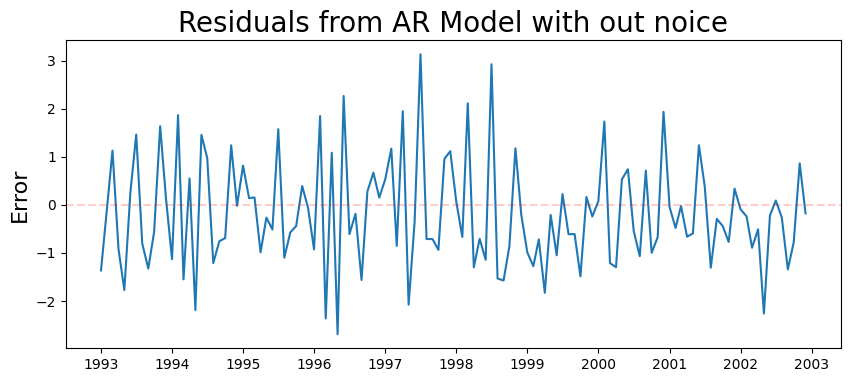

In [26]:
err = rolling_predictions-acc
plt.figure(figsize=(10,4))
plt.plot(err)
plt.title('Residuals from AR Model with out noice', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'temp')

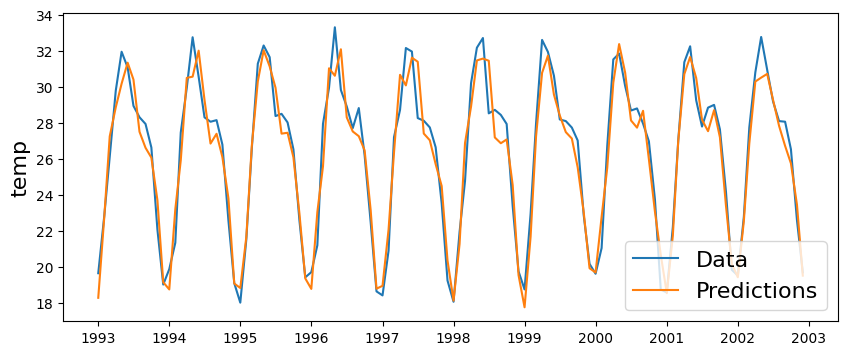

In [27]:
plt.figure(figsize=(10,4))

# plt.plot(df_long.Temperature) # plot the all dataset
plt.plot(test_data)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.ylabel('temp', fontsize=16)

In [28]:
print('Mean Absolute Percent Error with noice:', round(np.mean(abs(err/test_data)),4))


Mean Absolute Percent Error with noice: 0.0348


In [29]:
print('Root Mean Squared Error:', np.sqrt(np.mean(err**2)))

Root Mean Squared Error: 1.1381071902319415


In [51]:
rolling_predictions

Date
1993-01-01    18.291342
1993-02-01    22.787743
1993-03-01    27.258869
1993-04-01    28.870785
1993-05-01    30.184144
                ...    
2002-08-01    27.842178
2002-09-01    26.729397
2002-10-01    25.757127
2002-11-01    23.459968
2002-12-01    19.522251
Name: Temperature, Length: 120, dtype: float64

In [31]:
predict_data=pd.DataFrame(rolling_predictions,columns=["Temperature"])

In [32]:
get_reconvart_pred=TemperatureDataTransformer(predict_data)
get_reconvart_pred.long_to_wide(predict_data)

Month,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1993,18.291342,22.787743,27.258869,28.870785,30.184144,31.349148,30.411310,27.513551,26.622108,26.075458,23.716388,19.157126
1,1994,18.755799,23.212162,25.920315,30.507364,30.574002,32.018780,29.285807,26.858127,27.401017,26.106996,23.816552,19.084681
2,1995,18.835476,21.671046,26.707880,30.305654,32.040190,31.141946,29.958695,27.409136,27.457783,26.096841,22.967229,19.368098
3,1996,18.785504,23.050270,25.590578,31.039632,30.624906,32.094081,28.316260,27.529870,27.267819,26.480082,23.164224,18.797067
4,1997,18.956093,22.074773,26.358978,30.675856,30.088929,31.627346,31.403054,27.414805,27.041597,25.717024,24.499644,20.364308
5,1998,18.131954,21.283736,26.889507,28.914091,31.475340,31.577464,31.458379,27.199198,26.875984,27.086048,24.547860,19.553339
6,1999,17.764594,21.679059,27.251208,30.785346,31.740091,29.575184,28.420048,27.493631,27.138106,25.541018,23.044397,19.932728
7,2000,19.697655,22.787841,25.522057,30.234191,32.384579,30.795197,28.143159,27.742052,28.678176,25.984697,23.085115,20.677775
8,2001,18.548937,21.732944,27.023214,30.713984,31.665864,30.503586,28.181672,27.546184,28.713371,27.207768,23.421125,20.184927
9,2002,19.432063,22.550974,26.854626,30.302864,30.519967,30.728019,29.289383,27.842178,26.729397,25.757127,23.459968,19.522251


In [33]:
get_reconvart=TemperatureDataTransformer(test_data)
get_reconvart.long_to_wide(test_data)

Month,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1993,19.656,22.851,26.131,29.796,31.958,31.087,28.950,28.319,27.947,26.638,22.083,19.026
1,1994,19.885,21.347,27.470,29.959,32.763,30.565,28.314,28.070,28.159,26.800,22.579,19.104
2,1995,18.021,21.533,26.554,31.294,32.306,31.656,28.385,28.509,28.031,26.538,22.576,19.429
3,1996,19.715,21.205,27.954,29.957,33.317,29.831,28.924,27.716,28.831,26.204,22.495,18.647
4,1997,18.424,20.906,27.213,28.731,32.165,31.968,28.273,28.127,27.754,26.655,23.544,19.249
5,1998,18.070,21.952,24.778,30.213,32.182,32.721,28.536,28.731,28.450,27.945,23.374,19.761
6,1999,18.755,22.955,27.970,32.615,31.950,30.624,28.197,28.106,27.746,27.029,22.881,20.175
7,2000,19.627,21.055,26.735,31.532,31.857,30.055,28.693,28.810,27.967,26.983,23.758,18.745
8,2001,18.593,22.214,27.048,31.377,32.261,29.266,27.803,28.854,29.007,27.648,24.193,19.848
9,2002,19.528,22.792,27.747,30.812,32.780,30.951,29.200,28.106,28.072,26.541,22.598,19.701


In [34]:
from sklearn.metrics import r2_score
r2_score(test_data,rolling_predictions)

0.9314025863709013

### sarimax model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
my_order = (0,1,0)
my_seasonal_order = (7, 0, 1, 12)
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
# Fit the model
model_fit = model.fit()

# Print summary
print(model_fit.summary())

d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\projects\internship\werather_forcastiing\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                          Temperature   No. Observations:                 1104
Model:             SARIMAX(0, 1, 0)x(7, 0, [1], 12)   Log Likelihood               -1620.257
Date:                              Sat, 15 Mar 2025   AIC                           3258.513
Time:                                      20:25:16   BIC                           3303.565
Sample:                                  01-01-1901   HQIC                          3275.554
                                       - 12-01-1992                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9436      0.032     29.638      0.000       0.881       1.006
ar.S.L24       0.10

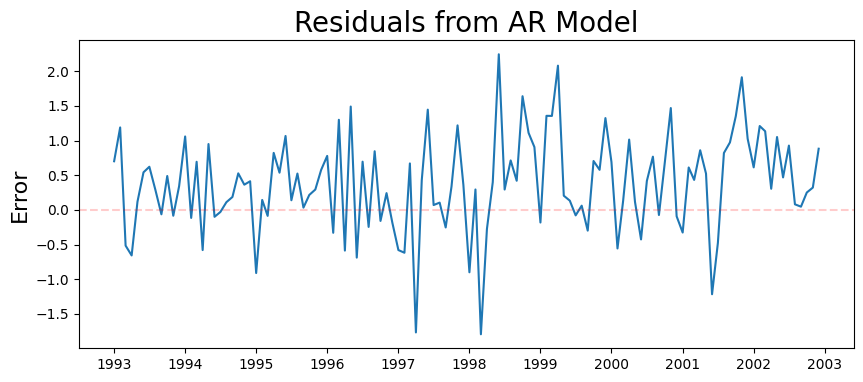

In [ ]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]


#get the predictions and residuals
pred = model_fit.predict(start=pred_start_date, end=pred_end_date)
# pred=pred.cumsum()+df[mon].iloc[split_size+1]
acc=test_data
residuals = acc-pred

# plotting error
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [39]:
test_data,pred

(Date
 1993-01-01    19.656
 1993-02-01    22.851
 1993-03-01    26.131
 1993-04-01    29.796
 1993-05-01    31.958
                ...  
 2002-08-01    28.106
 2002-09-01    28.072
 2002-10-01    26.541
 2002-11-01    22.598
 2002-12-01    19.701
 Name: Temperature, Length: 120, dtype: float64,
 1993-01-01    18.954544
 1993-02-01    21.661771
 1993-03-01    26.647240
 1993-04-01    30.453686
 1993-05-01    31.840177
                 ...    
 2002-08-01    28.026062
 2002-09-01    28.025981
 2002-10-01    26.290595
 2002-11-01    22.276660
 2002-12-01    18.818795
 Freq: MS, Name: predicted_mean, Length: 120, dtype: float64)

Text(0, 0.5, 'temp')

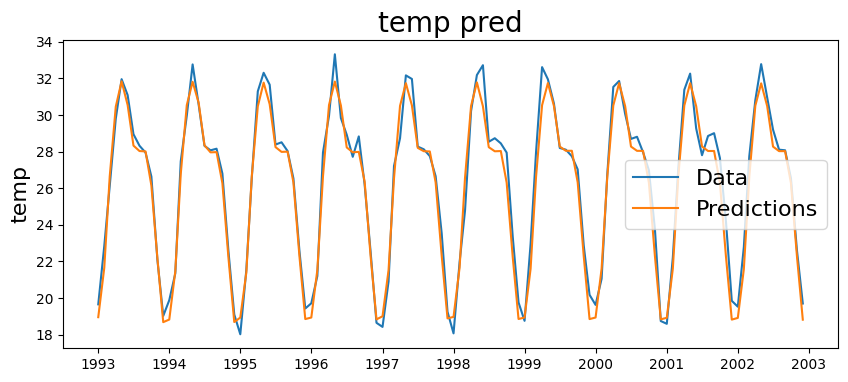

In [40]:
plt.figure(figsize=(10,4))

# plt.plot(test_data[month])
# plt.plot(predictions)
plt.plot(acc)
plt.plot(pred)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('temp pred', fontsize=20)
plt.ylabel('temp', fontsize=16)

In [74]:
predict_data=pd.DataFrame(test_data,columns=["Temperature"])

In [75]:
predict_data["Temperature"]=pred

In [76]:
predict_data

,Temperature
Date,
1993-01-01,18.954544
1993-02-01,21.661771
1993-03-01,26.647240
1993-04-01,30.453686
1993-05-01,31.840177
...,...
2002-08-01,28.026062
2002-09-01,28.025981
2002-10-01,26.290595


In [78]:
test_data=pd.DataFrame(test_data,columns=["Temperature"])
test_data

,Temperature
Date,
1993-01-01,19.656
1993-02-01,22.851
1993-03-01,26.131
1993-04-01,29.796
1993-05-01,31.958
...,...
2002-08-01,28.106
2002-09-01,28.072
2002-10-01,26.541


In [79]:
get_reconvart_pred=TemperatureDataTransformer(predict_data)
get_reconvart_pred.long_to_wide(predict_data)

Month,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1993,18.954544,21.661771,26.647240,30.453686,31.840177,30.544930,28.328069,28.030231,28.011284,26.149662,22.168131,18.683789
1,1994,18.825991,21.463127,26.776156,30.539049,31.813307,30.665347,28.344613,27.959205,27.973172,26.273069,22.215573,18.691185
2,1995,18.932510,21.389780,26.640914,30.471529,31.769811,30.589862,28.246097,27.985071,27.998727,26.322695,22.282635,18.852041
3,1996,18.936443,21.535811,26.654223,30.544567,31.826267,30.519907,28.228840,27.962018,27.985173,26.363532,22.253381,18.833725
4,1997,19.004082,21.524651,26.542953,30.499552,31.738571,30.522076,28.203346,28.022486,28.008079,26.317620,22.325060,18.889545
5,1998,18.970753,21.657888,26.573095,30.489508,31.781929,30.476152,28.242473,28.017816,28.030278,26.305232,22.263071,18.854906
6,1999,18.937641,21.598372,26.614479,30.534415,31.745614,30.491435,28.276474,28.045507,28.045348,26.323956,22.303469,18.850915
7,2000,18.936805,21.611999,26.604905,30.517850,31.742341,30.481372,28.274916,28.042172,28.041180,26.303205,22.288970,18.838141
8,2001,18.920302,21.602304,26.615833,30.516729,31.738178,30.483424,28.279089,28.033448,28.033725,26.296554,22.279788,18.822243
9,2002,18.915118,21.582319,26.612355,30.507482,31.728989,30.482600,28.272755,28.026062,28.025981,26.290595,22.276660,18.818795


In [80]:
get_reconvart=TemperatureDataTransformer(test_data)
get_reconvart.long_to_wide(test_data)

Month,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1993,19.656,22.851,26.131,29.796,31.958,31.087,28.950,28.319,27.947,26.638,22.083,19.026
1,1994,19.885,21.347,27.470,29.959,32.763,30.565,28.314,28.070,28.159,26.800,22.579,19.104
2,1995,18.021,21.533,26.554,31.294,32.306,31.656,28.385,28.509,28.031,26.538,22.576,19.429
3,1996,19.715,21.205,27.954,29.957,33.317,29.831,28.924,27.716,28.831,26.204,22.495,18.647
4,1997,18.424,20.906,27.213,28.731,32.165,31.968,28.273,28.127,27.754,26.655,23.544,19.249
5,1998,18.070,21.952,24.778,30.213,32.182,32.721,28.536,28.731,28.450,27.945,23.374,19.761
6,1999,18.755,22.955,27.970,32.615,31.950,30.624,28.197,28.106,27.746,27.029,22.881,20.175
7,2000,19.627,21.055,26.735,31.532,31.857,30.055,28.693,28.810,27.967,26.983,23.758,18.745
8,2001,18.593,22.214,27.048,31.377,32.261,29.266,27.803,28.854,29.007,27.648,24.193,19.848
9,2002,19.528,22.792,27.747,30.812,32.780,30.951,29.200,28.106,28.072,26.541,22.598,19.701


In [81]:
from sklearn.metrics import r2_score
r2_score(test_data,pred)

0.9668164981264369

### rolling window sarima

In [249]:
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming df_long is your long-format time series with a DateTime index
# Ensure the index has a frequency (e.g., 'MS' for monthly data)
df_long = df_long.asfreq('MS')

# Create a copy of the test data to store rolling predictions
rolling_predictions = test_data.copy()

# Iterate over the test data index
for train_end in test_data.index:
    # Extract training data up to the current train_end (excluding the last observation)
    train_data_roll = df_long[:train_end][:-1]
    
    # Fit the ARIMA model
    my_order = (0,1,0)
    my_seasonal_order = (7, 0, 1, 12)
    model = SARIMAX(train_data_roll, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()  # Use a valid optimization method
    
    # Forecast the next value
    pred = model_fit.forecast()
    
    # Store the prediction in the rolling_predictions DataFrame
    rolling_predictions.loc[train_end] = pred.iloc[0]  # Use .iloc[0] to avoid FutureWarning
    
    print(f"Prediction for {train_end}: {pred.iloc[0]}")

# Print the final rolling predictions
print(rolling_predictions)

Prediction for 1993-01-01 00:00:00: 18.954544394448945
Prediction for 1993-02-01 00:00:00: 22.364137401210037
Prediction for 1993-03-01 00:00:00: 27.86112998668314
Prediction for 1993-04-01 00:00:00: 29.952368336423653
Prediction for 1993-05-01 00:00:00: 31.220242282343072
Prediction for 1993-06-01 00:00:00: 30.580624268465627
Prediction for 1993-07-01 00:00:00: 28.849309441877008


KeyboardInterrupt: 

In [ ]:
err = rolling_predictions-acc
plt.figure(figsize=(10,4))
plt.plot(err)
plt.title('Residuals from AR Model with out noice', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [ ]:
plt.figure(figsize=(10,4))

# plt.plot(df_long.Temperature) # plot the all dataset
plt.plot(test_data)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.ylabel('temp', fontsize=16)

In [ ]:
from sklearn.metrics import r2_score
r2_score(test_data,rolling_predictions)